<a href="https://colab.research.google.com/github/Aabir-Chakraborty/DL/blob/main/DL_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deep Learning Assignment 3

Question 1 & 2 
1.	Create a single layer neural network to classify the self generated random data.
2. Study the single layer neural network for different Learning rates

In [ ]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [ ]:
x = torch.rand(20,3)*10
x.shape

torch.Size([20, 3])

In [ ]:
x

tensor([[5.7964, 5.0419, 5.9220],
        [9.6071, 5.3653, 3.2517],
        [4.3791, 1.3331, 6.3578],
        [6.9410, 1.8405, 9.0341],
        [0.2041, 1.3687, 4.5937],
        [7.8945, 3.5058, 3.3082],
        [2.4874, 8.1935, 9.2465],
        [9.6677, 6.6435, 3.6975],
        [6.5458, 5.3120, 2.2228],
        [2.0092, 9.8549, 7.9792],
        [0.5058, 8.4537, 1.3647],
        [8.3921, 0.9383, 1.5300],
        [0.8836, 5.3079, 2.8680],
        [8.0936, 1.9450, 8.3507],
        [9.5047, 7.8001, 7.9076],
        [7.8165, 0.2837, 5.4821],
        [4.9995, 1.5086, 8.5501],
        [6.5257, 9.4286, 7.2864],
        [3.8180, 4.1259, 4.1694],
        [0.1381, 4.3015, 8.2263]])

In [ ]:
y = torch.rand(20,1)*100
y.shape

torch.Size([20, 1])

In [ ]:
y

tensor([[39.3296],
        [30.8728],
        [88.4547],
        [ 3.5542],
        [69.7375],
        [64.8233],
        [46.8841],
        [96.7816],
        [ 8.1775],
        [12.2877],
        [16.5330],
        [ 8.8257],
        [ 4.6044],
        [ 2.8395],
        [16.5588],
        [ 6.8242],
        [ 5.6048],
        [81.6455],
        [ 2.7821],
        [90.5780]])

In [ ]:
comparison = []

In [ ]:
for step_size in [1e-2,1e-3,1e-4]:
    g = torch.Generator().manual_seed(2147483647)
    W = torch.randn((3,1), generator=g, requires_grad=True)
    loss_list = []
    for i in range(100):
        pred = x@W
        loss = (abs(y-pred)).sum()
        loss.backward()
        W.data -= step_size*W.grad
        W.grad = None
        if (i+1)%10==0:
            print(f'Epoch [{i+1}/100]: {loss}')
            loss_list.append(loss.item())
    comparison.append(loss_list)


Epoch [10/100]: 551.0555419921875
Epoch [20/100]: 541.1200561523438
Epoch [30/100]: 538.5914306640625
Epoch [40/100]: 536.0629272460938
Epoch [50/100]: 537.8639526367188
Epoch [60/100]: 538.9588012695312
Epoch [70/100]: 538.2586059570312
Epoch [80/100]: 535.4159545898438
Epoch [90/100]: 539.2325439453125
Epoch [100/100]: 535.7661743164062
Epoch [10/100]: 691.3789672851562
Epoch [20/100]: 584.5892944335938
Epoch [30/100]: 566.5418701171875
Epoch [40/100]: 563.507568359375
Epoch [50/100]: 560.5827026367188
Epoch [60/100]: 557.955322265625
Epoch [70/100]: 555.27978515625
Epoch [80/100]: 552.6829833984375
Epoch [90/100]: 550.0862426757812
Epoch [100/100]: 547.4154663085938
Epoch [10/100]: 932.568359375
Epoch [20/100]: 900.3232421875
Epoch [30/100]: 868.0781860351562
Epoch [40/100]: 835.833251953125
Epoch [50/100]: 803.588134765625
Epoch [60/100]: 771.3430786132812
Epoch [70/100]: 739.0980224609375
Epoch [80/100]: 714.4819946289062
Epoch [90/100]: 696.4556274414062
Epoch [100/100]: 681.8250

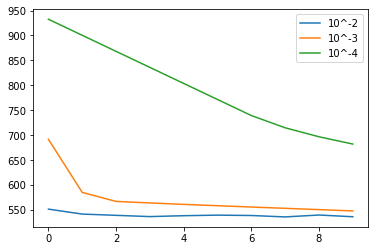

In [ ]:
for l in comparison:
    plt.plot(l)
    plt.legend(['10^-2','10^-3','10^-4'])

Question 3
3.	Create a Deep Multi Layer Neural Network to classify self generated random data.

In [ ]:
x = torch.rand(20,3)*10
y = torch.rand(20,1)*100

In [ ]:
x

tensor([[9.1320e+00, 1.6979e+00, 2.7646e+00],
        [5.0618e+00, 6.0735e+00, 1.3771e+00],
        [1.4835e+00, 8.4999e+00, 8.2100e+00],
        [2.9713e+00, 2.7001e-01, 6.2362e+00],
        [1.1662e+00, 2.0240e+00, 2.7030e+00],
        [9.0389e-01, 8.5913e+00, 1.3339e+00],
        [5.1487e+00, 9.2223e+00, 6.4189e+00],
        [7.5786e+00, 9.3214e+00, 9.8917e+00],
        [2.5677e+00, 9.2708e-01, 3.3914e+00],
        [4.2928e+00, 2.4770e+00, 9.0987e+00],
        [3.5273e+00, 5.1608e+00, 4.5403e+00],
        [9.1859e+00, 8.6157e+00, 4.3910e+00],
        [8.7455e+00, 4.8324e+00, 7.3407e+00],
        [5.9141e+00, 1.9190e+00, 7.1905e+00],
        [9.2076e+00, 9.1431e+00, 8.2016e+00],
        [1.1927e-03, 2.1674e-01, 2.4992e+00],
        [8.4769e+00, 4.4451e+00, 2.7965e+00],
        [6.6663e+00, 9.4539e+00, 3.4994e+00],
        [5.5821e+00, 4.0645e+00, 2.0486e+00],
        [4.8281e+00, 2.4412e+00, 7.9099e+00]])

In [ ]:
y

tensor([[25.4562],
        [87.1057],
        [38.2461],
        [80.4039],
        [93.8258],
        [97.0052],
        [86.3946],
        [17.0727],
        [46.9263],
        [15.6148],
        [24.7618],
        [ 4.4258],
        [18.7729],
        [67.3409],
        [ 5.4185],
        [77.4826],
        [62.3685],
        [98.2920],
        [22.9041],
        [32.5445]])

In [ ]:
train_ds = TensorDataset(x,y)

In [ ]:
batch_size=5
train_dl = DataLoader(train_ds,batch_size,shuffle=True)

In [ ]:
class MLP(nn.Module):
    def __init__(self,input_size,hidden_size,output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size,hidden_size)
        self.layer2 = nn.Linear(hidden_size,output_size)

    def forward(self,x):
        out = self.layer1(x)
        out = F.relu(out)
        out = self.layer2(out)
        out = F.relu(out)
        return out

In [ ]:
input_size = 3
hidden_size = 8
output_size = 1
model = MLP(input_size,hidden_size,output_size)

In [ ]:
loss_fn = F.mse_loss
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

In [ ]:
def fit(epochs,model,loss_fn,opt,train_dl):
    for epoch in range(epochs):
        for x,y in train_dl:
            pred = model(x)
            loss = loss_fn(pred,y)
            loss.backward()
            opt.step()
            opt.zero_grad()
        if (epoch+1)%10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, loss.item()))

In [ ]:
fit(100,model,loss_fn,opt,train_dl)

Epoch [10/100], Loss: 4605.1475
Epoch [20/100], Loss: 2258.6782
Epoch [30/100], Loss: 1052.0607
Epoch [40/100], Loss: 6153.2666
Epoch [50/100], Loss: 2190.4160
Epoch [60/100], Loss: 2827.6025
Epoch [70/100], Loss: 1422.1980
Epoch [80/100], Loss: 1373.0116
Epoch [90/100], Loss: 4938.5757
Epoch [100/100], Loss: 2719.7805
